In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, BatchNormalization, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD,RMSprop, Adam

In [2]:
def load():
  (X_train, y_train), (X_test, y_test) = mnist.load_data()
  X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
  X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
  y_train = to_categorical(y_train, 10)
  y_test = to_categorical(y_test, 10)
  return X_train, y_train, X_test, y_test

In [3]:
def preprocess(X_train, X_test):
  X_train_norm = X_train.astype('float32') / 255
  X_test_norm = X_test.astype('float32') / 255
  return X_train_norm, X_test_norm

In [4]:
def cnn_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D(2, 2))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
  model.add(MaxPooling2D(2, 2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))

  optimizer = Adam(0.001)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Epoch 1/8
1875/1875 [==============================] - 58s 30ms/step - loss: 0.1073 - accuracy: 0.9663 - val_loss: 0.0391 - val_accuracy: 0.9882
Epoch 2/8
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0373 - accuracy: 0.9884 - val_loss: 0.0322 - val_accuracy: 0.9892
Epoch 3/8
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0259 - accuracy: 0.9922 - val_loss: 0.0255 - val_accuracy: 0.9919
Epoch 4/8
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0189 - accuracy: 0.9937 - val_loss: 0.0362 - val_accuracy: 0.9891
Epoch 5/8
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0128 - accuracy: 0.9960 - val_loss: 0.0347 - val_accuracy: 0.9899
Epoch 6/8
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0109 - accuracy: 0.9961 - val_loss: 0.0417 - val_accuracy: 0.9878
Epoch 7/8
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0086 - accuracy: 0.

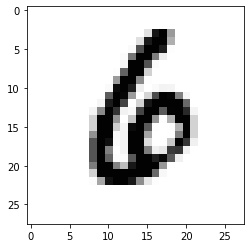

In [5]:
X_train, y_train, X_test, y_test = load()
X_train, X_test = preprocess(X_train, X_test)

# Digit example
image_index = 93
print(y_train[image_index]) # Label
plt.imshow(X_train[image_index].reshape(28, 28), cmap='Greys')

model = cnn_model()
history = model.fit(X_train, y_train, epochs=8, batch_size=32, validation_data=(X_test, y_test))

In [6]:
_, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy: {}%'.format(100*acc))

Test accuracy: 99.08000230789185%


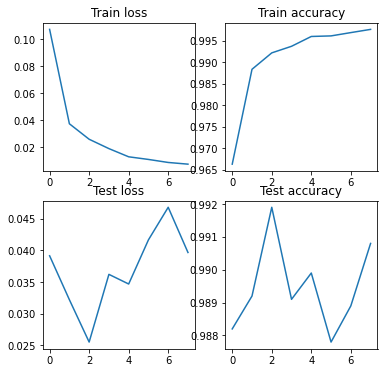

In [7]:
# Visualization

plt.figure(figsize=(6, 6))
plt.subplot(2, 2, 1)
plt.title('Train loss')
plt.plot(history.history['loss'])
plt.subplot(2, 2, 2)
plt.title('Train accuracy')
plt.plot(history.history['accuracy'])
plt.subplot(2, 2, 3)
plt.title('Test loss')
plt.plot(history.history['val_loss'])
plt.subplot(2, 2, 4)
plt.title('Test accuracy')
plt.plot(history.history['val_accuracy'])
plt.show()